In [56]:
import pandas as pd 
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gensim
from IPython.display import display,HTML
from gensim.models import Word2Vec
import tensorflow.compat.v1 as tf

warnings.filterwarnings('ignore')

In [2]:
''' reading data '''
df = pd.read_csv('hindi.txt')

In [3]:
''' displaying data '''
df.head()

,अत
0,अपना
1,अपनी
2,अपने
3,अभी
4,अंदर


In [4]:
''' checking null values '''
df.isnull().sum()

अत    0
dtype: int64

In [5]:
''' column names '''
df.columns

Index(['अत'], dtype='object')

In [6]:
def get_sw_lst(stop_file_path):
    
    """ opening file """
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        ''' reading lines '''
        stopwords = f.readlines()
        
        stop_set = set(m.strip() for m in stopwords)
        
        return list(frozenset(stop_set))

In [7]:
file_path = 'hindi.txt'

''' getting stopwords'''
s_words = get_sw_lst(file_path)

In [9]:
''' displaying top 5 stop words '''
s_words[:5]

['यही', 'लेकिन', 'उन्हों', 'यह', 'दुसरा']

In [10]:
print("Total Number of stopwords: ", len(s_words))

Total Number of stopwords:  169


In [12]:
''' creating list of corpus '''
corpus = [' प्रत्येक व्यक्ति को शिक्षा का अधिकार है', 'शिक्षा कम से कम प्रारम्भिक और बुनियादी अवस्थाओं में निःशुल्क होगी', 
          ' प्रारम्भिक शिक्षा अनिवार्य होगी । टेक्निकल']

In [13]:
''' creating list of stopwords '''
stop_words = ['एक', 'दूसरे', 'नहीं', 'पूरा', 'व', 'वे', 'लिये', 'कोई', 'वहाँ', 'उसी']

In [14]:
''' removing stopwords '''
def remove_s_words(c):
    res = []
    for text in c:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        res.append(" ".join(tmp))
        
    return res

In [15]:
''' passing corpus to a funciton '''
corpus = remove_s_words(corpus)

In [16]:
corpus

[' प्रत्येक व्यक्ति को शिक्षा का अधिकार है',
 'शिक्षा कम से कम प्रारम्भिक और बुनियादी अवस्थाओं में निःशुल्क होगी',
 ' प्रारम्भिक शिक्षा अनिवार्य होगी । टेक्निकल']

In [21]:
''' creating a set of words '''

total_words = []
for text in corpus:
    ''' splitting '''
    for t in text.split():
        total_words.append(t)
    
total_words = set(total_words)

In [23]:
total_words

{'अधिकार',
 'अनिवार्य',
 'अवस्थाओं',
 'और',
 'कम',
 'का',
 'को',
 'टेक्निकल',
 'निःशुल्क',
 'प्रत्येक',
 'प्रारम्भिक',
 'बुनियादी',
 'में',
 'व्यक्ति',
 'शिक्षा',
 'से',
 'है',
 'होगी',
 '।'}

In [27]:
word_dict = {}

for idx, word in enumerate(total_words):
    word_dict[word] = idx
    
sent = []

for s in corpus:
    sent.append(s.split())
    
size = 2

data = []
for s in sent:
    for idx, w in enumerate(s):
        for neighbor in s[max(idx - size, 0): min(idx + size, len(s) + 1)]:
            if neighbor != w:
                data.append([w, neighbor])

In [28]:
for t in corpus:
    print(t)

''' creating a dataframe'''
df = pd.DataFrame(data, columns = ['input', 'label'])

 प्रत्येक व्यक्ति को शिक्षा का अधिकार है
शिक्षा कम से कम प्रारम्भिक और बुनियादी अवस्थाओं में निःशुल्क होगी
 प्रारम्भिक शिक्षा अनिवार्य होगी । टेक्निकल


In [29]:
''' displaying top 5 rows '''
df.head()

,input,label
0,प्रत्येक,व्यक्ति
1,व्यक्ति,प्रत्येक
2,व्यक्ति,को
3,को,प्रत्येक
4,को,व्यक्ति


In [30]:
''' shape of data '''
df.shape

(59, 2)

In [31]:
word_dict

{'प्रारम्भिक': 0,
 'शिक्षा': 1,
 'अधिकार': 2,
 'कम': 3,
 'को': 4,
 'में': 5,
 'निःशुल्क': 6,
 'और': 7,
 'का': 8,
 'बुनियादी': 9,
 'अवस्थाओं': 10,
 'है': 11,
 'व्यक्ति': 12,
 'प्रत्येक': 13,
 'अनिवार्य': 14,
 'टेक्निकल': 15,
 '।': 16,
 'होगी': 17,
 'से': 18}

In [34]:
tf.disable_v2_behavior()
x = tf.placeholder(shape=[None, 2], dtype=tf.float32)

In [38]:
"""Define Tensorflow Graph"""

one_hot_dim = len(total_words)

'''function to convert numbers to one hot vectors'''
def to_one_hot_enc(d):
    o_h_enc = np.zeros(one_hot_dim)
    o_h_enc[d] = 1
    return o_h_enc

''' independent and dependent variables '''
X = [] 
Y = [] 

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_enc(word_dict[ x ]))
    Y.append(to_one_hot_enc(word_dict[ y ]))

''' converting X and Y to numpy array '''
X_train = np.asarray(X)
y_train = np.asarray(Y)

'''making placeholders for X_train and Y_train'''
x = tf.placeholder(tf.float32, shape=(None, one_hot_dim))
y_label = tf.placeholder(tf.float32, shape=(None, one_hot_dim))

'''word embedding will be 2 dimension for 2d visualization'''
emb_dim = 2 

''' hidden layer '''
w1 = tf.Variable(tf.random_normal([one_hot_dim, emb_dim]))
b1 = tf.Variable(tf.random_normal([1])) 

''' linear function '''
h1_layer = tf.add(tf.matmul(x, w1), b1)

'''output layer'''
w2 = tf.Variable(tf.random_normal([emb_dim, one_hot_dim]))
b2 = tf.Variable(tf.random_normal([1]))
pred = tf.nn.softmax(tf.add( tf.matmul(h1_layer, w2), b2))

''' Loss'''
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(pred), axis=[1]))

'''training operation'''
model= tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [41]:
''' training '''

session = tf.Session()
in__it = tf.global_variables_initializer()
session.run(in__it) 

itera = 20000
for i in range(itera):

    session.run(model, feed_dict={x: X_train, y_label: y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', session.run(loss, feed_dict={x: X_train, y_label: y_train}))

iteration 0 loss is :  3.5907733
iteration 3000 loss is :  2.1063764
iteration 6000 loss is :  1.980015
iteration 9000 loss is :  1.9352883
iteration 12000 loss is :  1.9026297
iteration 15000 loss is :  1.8770843
iteration 18000 loss is :  1.8624789


In [45]:
vec = session.run(w1 + b1)
print(vec)

[[ 2.9610758  -0.87181425]
 [ 0.1368976   0.19085908]
 [ 1.6397777   1.3902086 ]
 [ 5.4786634  -1.9656316 ]
 [-0.0764209   0.7848021 ]
 [-3.833498   -0.5560626 ]
 [-1.303459   -4.629134  ]
 [ 0.0893729  -0.11625892]
 [ 2.4224048   4.633761  ]
 [ 0.02087528 -0.57150316]
 [-0.3570994  -0.6078061 ]
 [ 2.0027375   3.374063  ]
 [ 0.3531857   4.3442993 ]
 [-2.8454747   2.1530232 ]
 [ 1.8430302  -0.84325695]
 [-0.38981217 -4.0756683 ]
 [ 0.78654474 -2.2659883 ]
 [-0.10317326 -0.23761016]
 [ 4.4625163  -0.17157799]]


In [46]:
''' creaing new dataframe '''
df_new = pd.DataFrame(vec, columns = ['x1', 'x2'])
df_new['word'] = total_words
df_new = df_new[['word', 'x1', 'x2']]

In [47]:
df_new.head()

,word,x1,x2
0,प्रारम्भिक,2.961076,-0.871814
1,शिक्षा,0.136898,0.190859
2,अधिकार,1.639778,1.390209
3,कम,5.478663,-1.965632
4,को,-0.076421,0.784802


In [48]:
df.tail()

,input,label
54,।,अनिवार्य
55,।,होगी
56,।,टेक्निकल
57,टेक्निकल,होगी
58,टेक्निकल,।


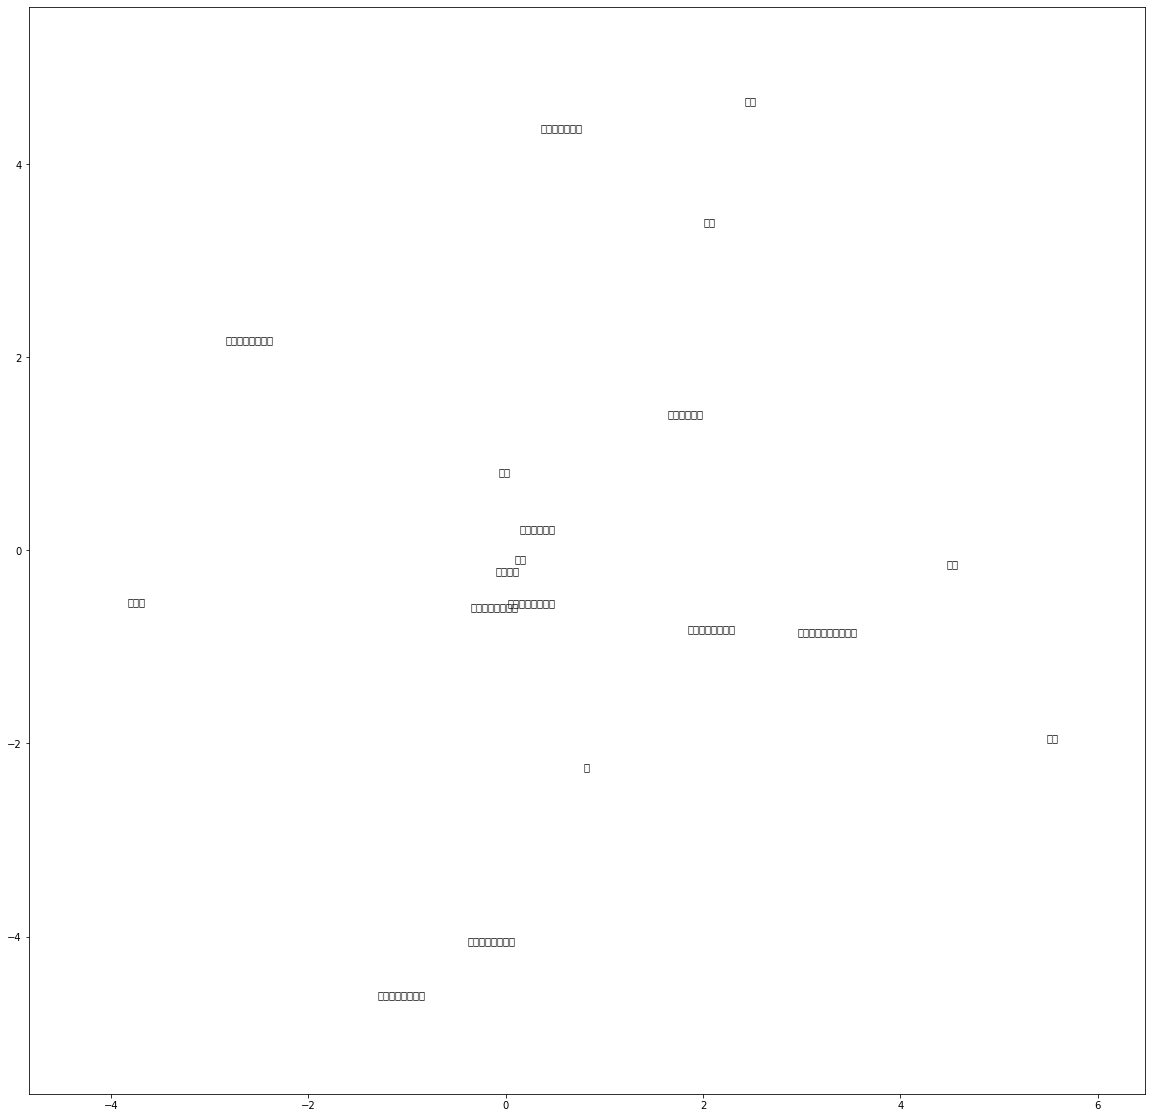

In [54]:
"""Word Vector in 2D Chart"""

fig, ax = plt.subplots()

for w, x1, x2 in zip(df_new['word'], df_new['x1'], df_new['x2']):
    ax.annotate(w, (x1,x2 ))
    
pad = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - pad
y_axis_min = np.amin(vectors, axis=0)[1] - pad
x_axis_max = np.amax(vectors, axis=0)[0] + pad
y_axis_max = np.amax(vectors, axis=0)[1] + pad
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (20,20)

plt.show();

In [58]:
''' displaying text '''

c1, c2, f1, f2, fs1, fs2='#eb3434','#eb3446','Akronim','Smokum', 30, 15

def disp_html(s, fc=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fc+"""; font-size:"""+\
    str(fc)+"""px;'>%s</h1>"""%s))

In [60]:
disp_html(''' प्रत्येक व्यक्ति को किसी भी ऐसी वैज्ञानिक, 
          साहित्यिक या कलास्मक कृति मे उत्पन्न नैतिक और आर्थिक हितों की रक्षा का अधिकार है जिसका रचयिता वह स्वयं हो ''' )